# Perfect code

In this notebook, I am going to implement the Perfect code, a $[[5, 1, 3]]$ error correcting code to fix all possible one-qubit error (bit-flip+phase-flip). Note that the number of physical qubits $n$ and the number of logical qubit $k$ used in error correcting non-degenerate code should satisfy the quantum Hamming bound,
\begin{equation}
\sum_{j=0}^{t} C_{n}^{j}3^{j}2^{k} \leq 2^{n} \iff 2(1+3n)\leq 2^n \text{ when }k=1
\end{equation}
where $n=5$ is the smallest quantum error correcting code in one logical qubit case. 

## I. Introduction of Background Knowledge
The perfect code is used to protect information of 1 qubit, and its encoding rules are complicated. We need to make a logical qubit as

\begin{align}
|0_L\rangle &= \frac{1}{4}(|00000\rangle + |10010\rangle + |01001\rangle + |10100\rangle \\
&+|01010\rangle - |11011\rangle - |00110\rangle - |11000\rangle \\
&-|11101\rangle - |00011\rangle - |11110\rangle - |01111\rangle \\
&-|10001\rangle - |01100\rangle - |10111\rangle + |00101\rangle )\\
\end{align}


\begin{align}
|1_L\rangle &= \frac{1}{4}(|11111\rangle + |01101\rangle + |10110\rangle + |01011\rangle \\
&+|10101\rangle - |00100\rangle - |11001\rangle - |00111\rangle \\
&-|00010\rangle - |11100\rangle - |00001\rangle - |10000\rangle \\
&-|01110\rangle - |10011\rangle - |01000\rangle + |11010\rangle )\\
\end{align}

Similarly, perfect code will perform correction with following procedure:
* Encode $|\psi\rangle$ , $|\psi_L\rangle=a|0_L\rangle+b|1_L\rangle$
* (Noise happen)
* Specify the noise with the help of syndrome from stabilizer. 
* Recover the noise with syndrome measurement result
* Decode $|\psi_L\rangle$ and re-generate $|\psi\rangle = a|0\rangle + b|1\rangle$

In the following sections, I will provide details of each steps and construct the corresponding circuit. 

In [1]:
# Import require package
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, Aer, IBMQ
from qiskit.visualization import plot_histogram
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

## II. The Procedure of Noise Correction
In this section, I will describe details of how to finish 5 steps of noise correction. 

### A. Encoding
The encoding process that transfer $|\psi\rangle=a|0\rangle+b|1\rangle$ into $|\psi_L\rangle = a|0_L\rangle + b|1_L\rangle$ is shown below...(to be continued)

In [2]:
# Construct quantum circuit
qreg_q = QuantumRegister(5, 'q')
qreg_a = QuantumRegister(4, 'a')
creg_c = ClassicalRegister(9, 'c')
circuit = QuantumCircuit(qreg_q, qreg_a, creg_c)

# Encoding...Still working on it

### B. Error Detection
In this case, we will consider a mixture of bit-flip noise and phase-flip noise as a single-qubit error. We need to specify which error happens and thus perform the corresponding recovery. The stabilizer code formulism will be helpful to build the detection code and specify error with syndrome. The stabilizer of perfect code is 
\begin{equation}
\mathcal{S} = \{XZZXI, IXZZX, XIXZZ, ZXIXZ\}.
\end{equation}
The corresponding syndrome for different error types is given by

| Error    |  $S_1$  | $S_2$   | $S_3$ | $S_4$ |
| :----:   |  :----: |  :----: |:----: |:----: |
| No Error |  +1     | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |
|     | -1      | +1      | +1    | +1    |

One can construct the error detecting circuit with the table above. In practice, CNOT gate is used to detect the eigenvalue of $Z$ operations...(to be continued)

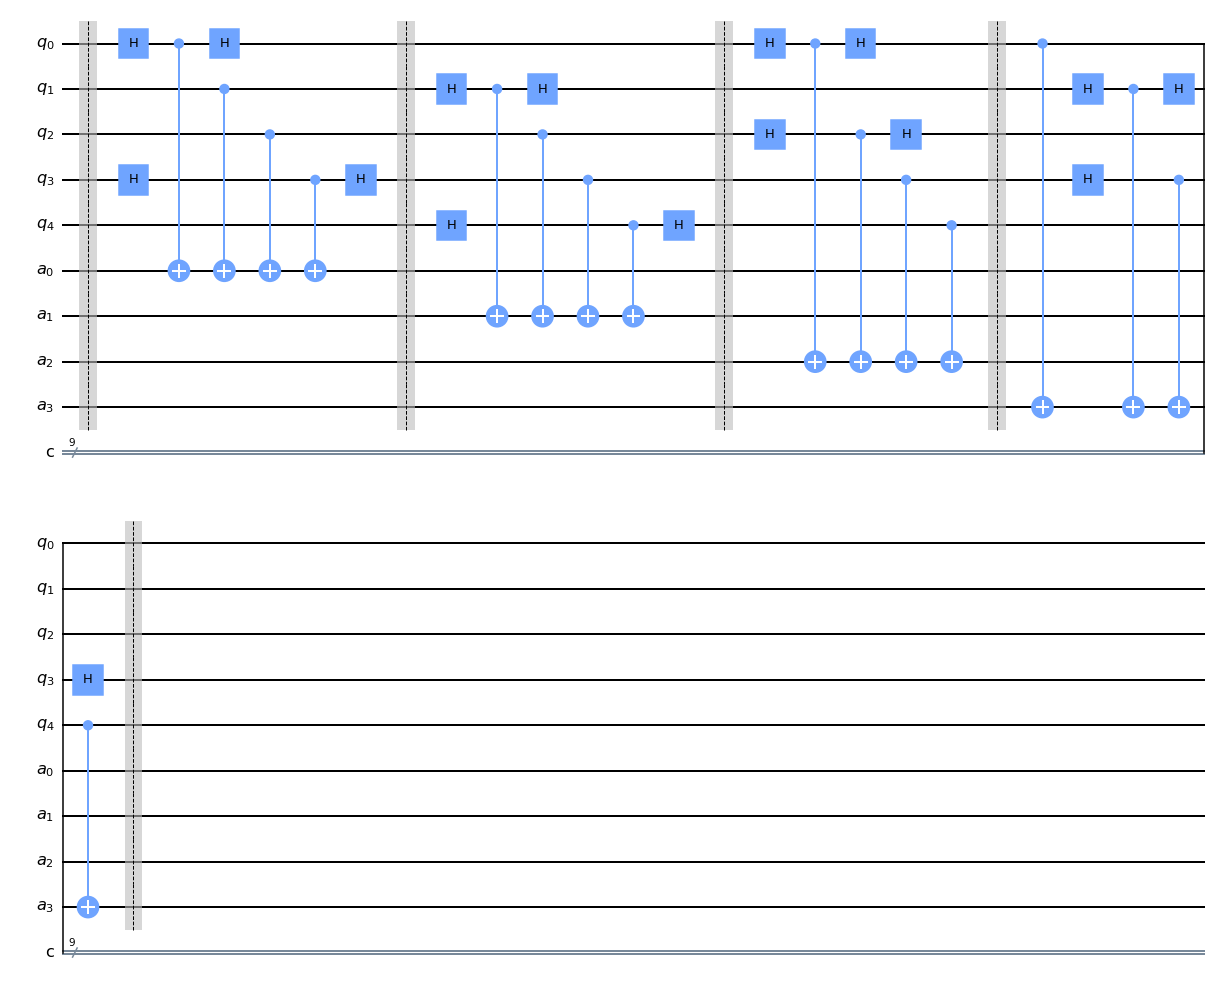

In [3]:
# Construct quantum circuit
qreg_q = QuantumRegister(5, 'q')
qreg_a = QuantumRegister(4, 'a')
creg_c = ClassicalRegister(9, 'c')
circuit = QuantumCircuit(qreg_q, qreg_a, creg_c)

# Error Detection Circuit
circuit.barrier()

# Correspond to stabilizer XZZXI
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_a[0])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[1], qreg_a[0])
circuit.cx(qreg_q[2], qreg_a[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_a[0])
circuit.h(qreg_q[3])
circuit.barrier()

# Correspond to stabilizer IXZZX
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_a[1])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[2], qreg_a[1])
circuit.cx(qreg_q[3], qreg_a[1])
circuit.h(qreg_q[4])
circuit.cx(qreg_q[4], qreg_a[1])
circuit.h(qreg_q[4])
circuit.barrier()

# Correspond to stabilizer XIXZZ
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_a[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[2], qreg_a[2])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[3], qreg_a[2])
circuit.cx(qreg_q[4], qreg_a[2])
circuit.barrier()


# Correspond to stabilizer ZXIXZ
circuit.cx(qreg_q[0], qreg_a[3])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_a[3])
circuit.h(qreg_q[1])

circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_a[3])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[4], qreg_a[3])
circuit.barrier()
circuit.draw()

### C. Recover the Noise
According to the table of syndrome, we can construct a recovery circuit to correct one of three possible error. In practice, CNOT gates and other kinds of multi-control gates will be used to reduce the noise according to the syndrome...(to be continued)

In [4]:
# Construct quantum circuit
qreg_q = QuantumRegister(7, 'q')
qreg_a = QuantumRegister(3, 'a')
creg_c = ClassicalRegister(10, 'c')
circuit = QuantumCircuit(qreg_q, qreg_a, creg_c)

# Recovery...Still working on it

### D. Decoding the Resulting State
Remember that we encode 1 qubit information into a 7-qubits state to protect it from the mixture error, thus we need to recover the initial input state, or decode the resulting state. The decoding process is simply the inverse of encoding process...(to be continued)

In [5]:
# Construct quantum circuit
qreg_q = QuantumRegister(7, 'q')
qreg_a = QuantumRegister(3, 'a')
creg_c = ClassicalRegister(10, 'c')
circuit = QuantumCircuit(qreg_q, qreg_a, creg_c)

# Decoding...Still working on it

## III. Test the Method
With detail description in each subsection, in this part, I combine 5 steps together and construct a complete circuit...(to be continued)